# Visualizing your data

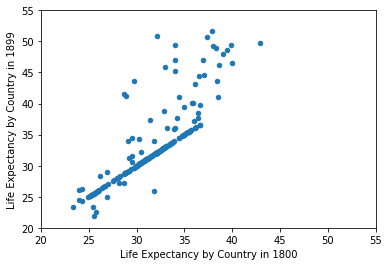

In [5]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt
import pandas as pd

g1800s = pd.read_csv('gapminder.csv')

# Create the scatter plot
g1800s.plot(kind='scatter', x='1800', y='1899')

# Specify axis labels
plt.xlabel('Life Expectancy by Country in 1800')
plt.ylabel('Life Expectancy by Country in 1899')

# Specify axis limits`
plt.xlim(20, 55)
plt.ylim(20, 55)

# Display the plot
plt.show()


# Thinking about the question at hand

In [10]:
import pandas as pd
g1800s = pd.read_csv('gapminder.csv')


def check_null_or_valid(row_data):
    """Function that takes a row of data,
    drops all missing values,
    and checks if all remaining values are greater than or equal to 0
    """
    no_na = row_data.dropna()
    numeric = pd.to_numeric(no_na)
    ge0 = numeric >= 0
    return ge0

# Check whether the first column is 'Life expectancy'
assert g1800s.columns[0] == 'Life expectancy'

# Check whether the value
s in the row are valid
assert g1800s.iloc[:, 1:].apply(check_null_or_valid, axis=1).all().all()

# Check that there is only one instance of each country
assert g1800s['Life expectancy'].value_counts()[0] == 1


SyntaxError: invalid syntax (<ipython-input-10-e581b0aa6a3c>, line 19)

# Assembling your data

In [12]:
# Concatenate the DataFrames row-wise
gapminder = pd.concat([g1800s,g1900s,g2000s])

# Print the shape of gapminder
print(gapminder.shape)

# Print the head of gapminder
print(gapminder.head())


NameError: name 'g1900s' is not defined

# Reshaping your data


In [ ]:

import pandas as pd
gapminder = pd.read_csv('gapminder.csv')

# Melt gapminder: gapminder_melt
gapminder_melt = pd.melt(frame = gapminder, id_vars = 'Life expectancy')

# Rename the columns
gapminder_melt.columns = ['country','year','life_expectancy']

# Print the head of gapminder_melt
print(gapminder_melt.head())


# Checking the data types

```python
# Convert the year column to numeric
gapminder.year = pd.to_numeric(gapminder['year'])

# Test if country is of type object
assert gapminder.country.dtypes == np.object

# Test if year is of type int64
assert gapminder.year.dtypes == np.int64

# Test if life_expectancy is of type float64
assert gapminder.life_expectancy.dtypes == np.float64
```

# Looking at country spellings

```python
# Create the series of countries: countries
countries = gapminder['country']

# Drop all the duplicates from countries
countries = countries.drop_duplicates()

# Write the regular expression: pattern
pattern = '^[A-za-z\.\s]*$'

# Create the Boolean vector: mask
mask = countries.str.contains(pattern)

# Invert the mask: mask_inverse
mask_inverse = ~mask

# Subset countries using mask_inverse: invalid_countries
invalid_countries = countries.loc[mask_inverse]

# Print invalid_countries
print(invalid_countries)
```

# More data cleaning and processing

In [21]:
# Assert that country does not contain any missing values
assert pd.notnull(gapminder.country).all()

# Assert that year does not contain any missing values
assert pd.notnull(gapminder.year).all()

# Drop the missing values
gapminder = gapminder.dropna()

# Print the shape of gapminder
print(gapminder.shape)


AttributeError: 'DataFrame' object has no attribute 'country'

# Wrapping up

AttributeError: 'DataFrame' object has no attribute 'life_expectancy'

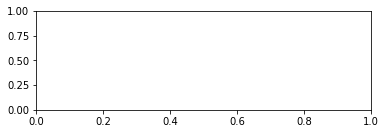

In [24]:
# Add first subplot
plt.subplot(2, 1, 1) 

# Create a histogram of life_expectancy
gapminder.life_expectancy.plot(kind='hist')

# Group gapminder: gapminder_agg
gapminder_agg = gapminder.groupby('year')['life_expectancy'].mean()

# Print the head of gapminder_agg
print(gapminder_agg.head())

# Print the tail of gapminder_agg
print(gapminder_agg.tail())

# Add second subplot
plt.subplot(2, 1, 2)

# Create a line plot of life expectancy per year
gapminder_agg.plot()

# Add title and specify axis labels
plt.title('Life expectancy over the years')
plt.ylabel('Life expectancy')
plt.xlabel('Year')

# Display the plots
plt.tight_layout()
plt.show()

# Save both DataFrames to csv files
gapminder.to_csv('gapminder.csv')
gapminder_agg.to_csv('gapminder_agg.csv')